# Study on the minimum wage over time in the EU

In [69]:
import pandas as pd

minimum_wage = pd.read_csv('earn_mw_cur_linear_2_0.csv')
inflation = pd.read_csv('tec00118_linear_2_0.csv')
minimum_wage.sample(1)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,currency,Currency,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
3246,dataflow,ESTAT:EARN_MW_CUR(1.0),Monthly minimum wages - bi-annual data,S,"Half-yearly, semesterly",NAC,National currency,MD,Moldova,2010-S1,NaN,600.0,NaN,NaN,NaN,NaN,NaN


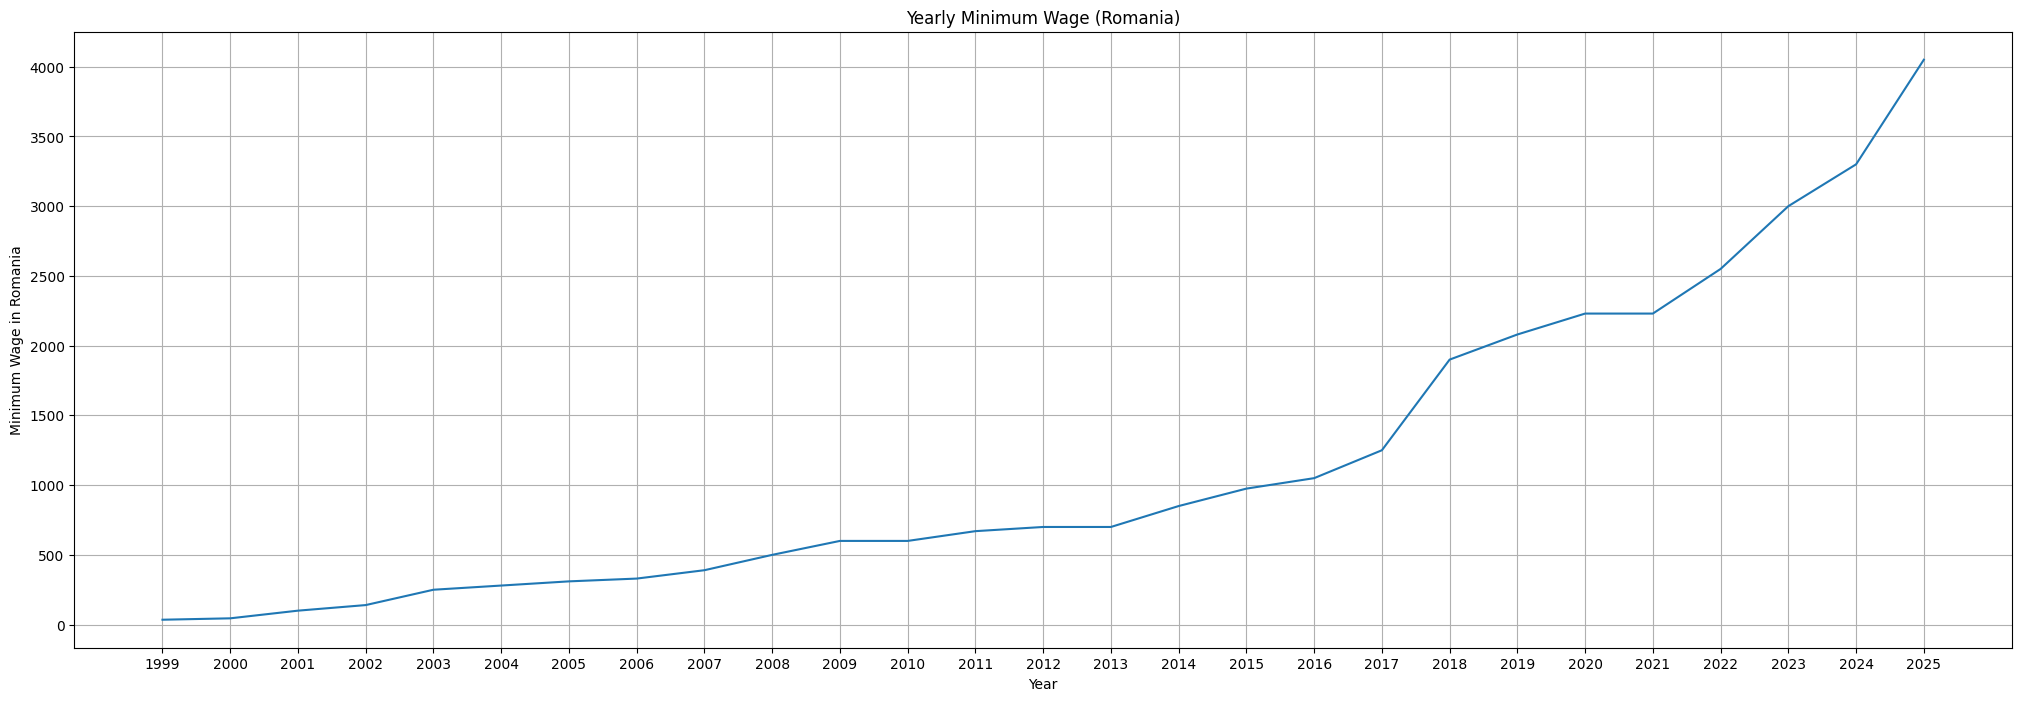

In [70]:
import matplotlib.pylab as plt
romania_minimum_wage_salaries = minimum_wage[(minimum_wage.geo == 'RO') & (minimum_wage.Currency == 'National currency') & (minimum_wage.TIME_PERIOD.str.endswith('S1'))][['TIME_PERIOD', 'OBS_VALUE']]

romania_minimum_wage_salaries.TIME_PERIOD = romania_minimum_wage_salaries.TIME_PERIOD.replace(r"-S1$", "", regex=True)
romania_minimum_wage_salaries.TIME_PERIOD = romania_minimum_wage_salaries.TIME_PERIOD.astype(int)
plt.figure(figsize=(25, 8))
plt.plot(romania_minimum_wage_salaries.TIME_PERIOD, romania_minimum_wage_salaries.OBS_VALUE)
plt.xlabel("Year")
plt.ylabel("Minimum Wage in Romania")
plt.title("Yearly Minimum Wage (Romania)")
plt.xticks(romania_minimum_wage_salaries.TIME_PERIOD)
plt.grid()

In [71]:
romania_minimum_wage_salaries['diff'] = romania_minimum_wage_salaries.OBS_VALUE.diff()
romania_minimum_wage_salaries.head()

,TIME_PERIOD,OBS_VALUE,diff
3599,1999,35.0,NaN
3601,2000,45.0,10.0
3603,2001,100.0,55.0
3605,2002,140.0,40.0
3607,2003,250.0,110.0


In [72]:
romania_minimum_wage_salaries["pct_change"] = romania_minimum_wage_salaries.OBS_VALUE.pct_change() * 100
romania_minimum_wage_salaries.head()

,TIME_PERIOD,OBS_VALUE,diff,pct_change
3599,1999,35.0,NaN,NaN
3601,2000,45.0,10.0,28.571429
3603,2001,100.0,55.0,122.222222
3605,2002,140.0,40.0,40.000000
3607,2003,250.0,110.0,78.571429


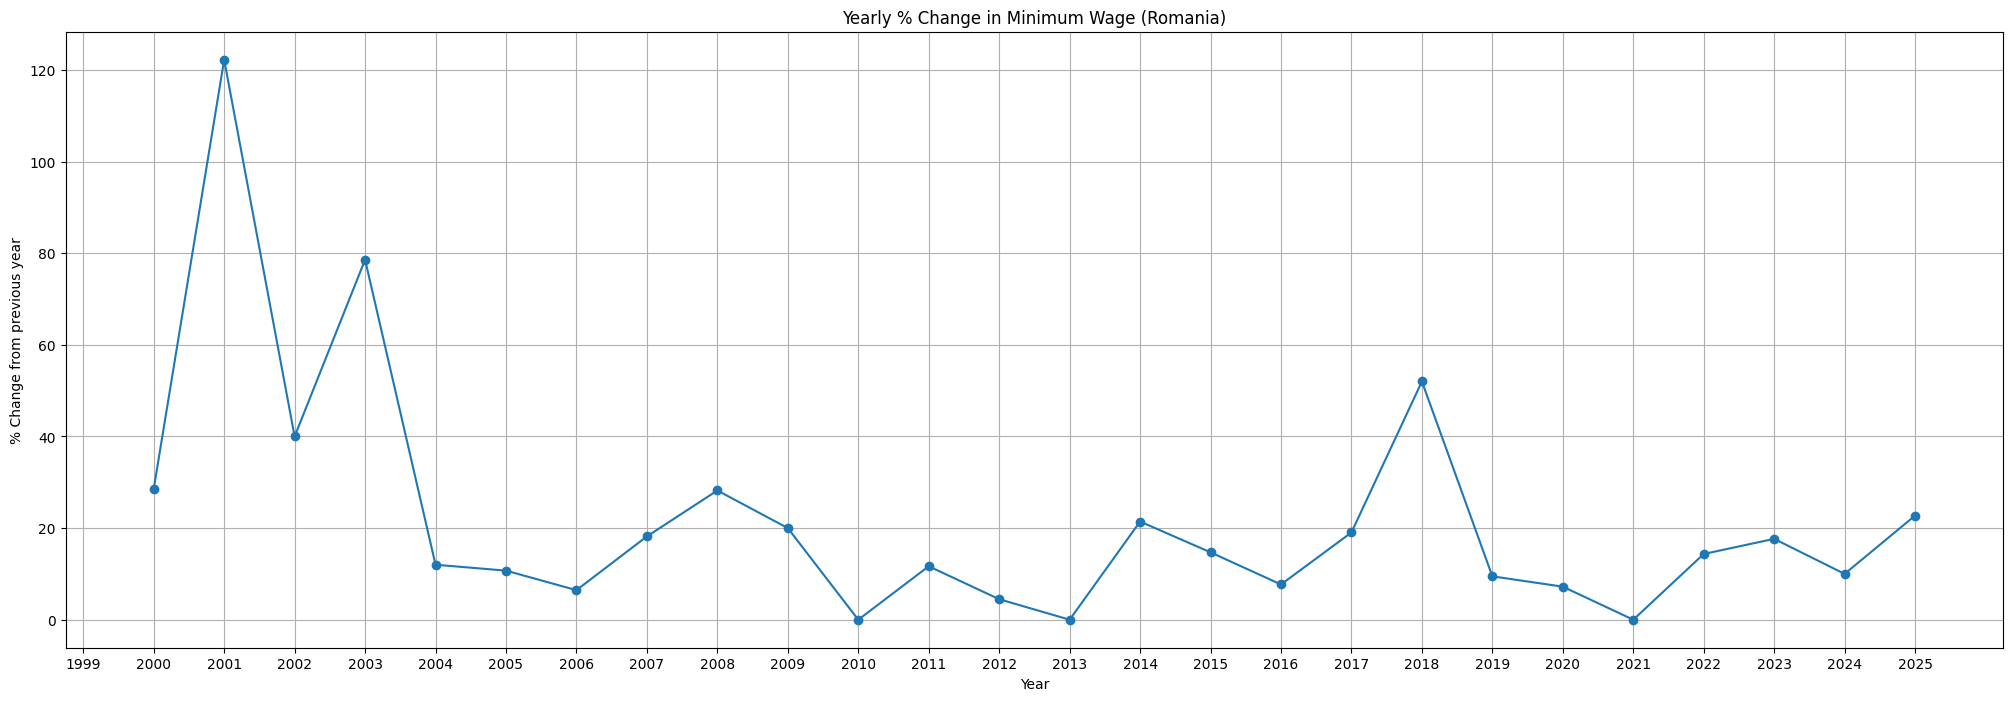

In [76]:
plt.figure(figsize=(25, 8))
plt.plot(
    romania_minimum_wage_salaries["TIME_PERIOD"],
    romania_minimum_wage_salaries["pct_change"],
    marker="o"
)
plt.xlabel("Year")
plt.ylabel("% Change from previous year")
plt.title("Yearly % Change in Minimum Wage (Romania)")
plt.xticks(romania_minimum_wage_salaries.TIME_PERIOD)
plt.grid()

In [77]:
inflation_romania = inflation[inflation.geo == 'RO'][['TIME_PERIOD', 'OBS_VALUE']]
inflation_romania.head(5)

,TIME_PERIOD,OBS_VALUE
377,2013,3.2
378,2014,1.4
379,2015,-0.4
380,2016,-1.1
381,2017,1.1


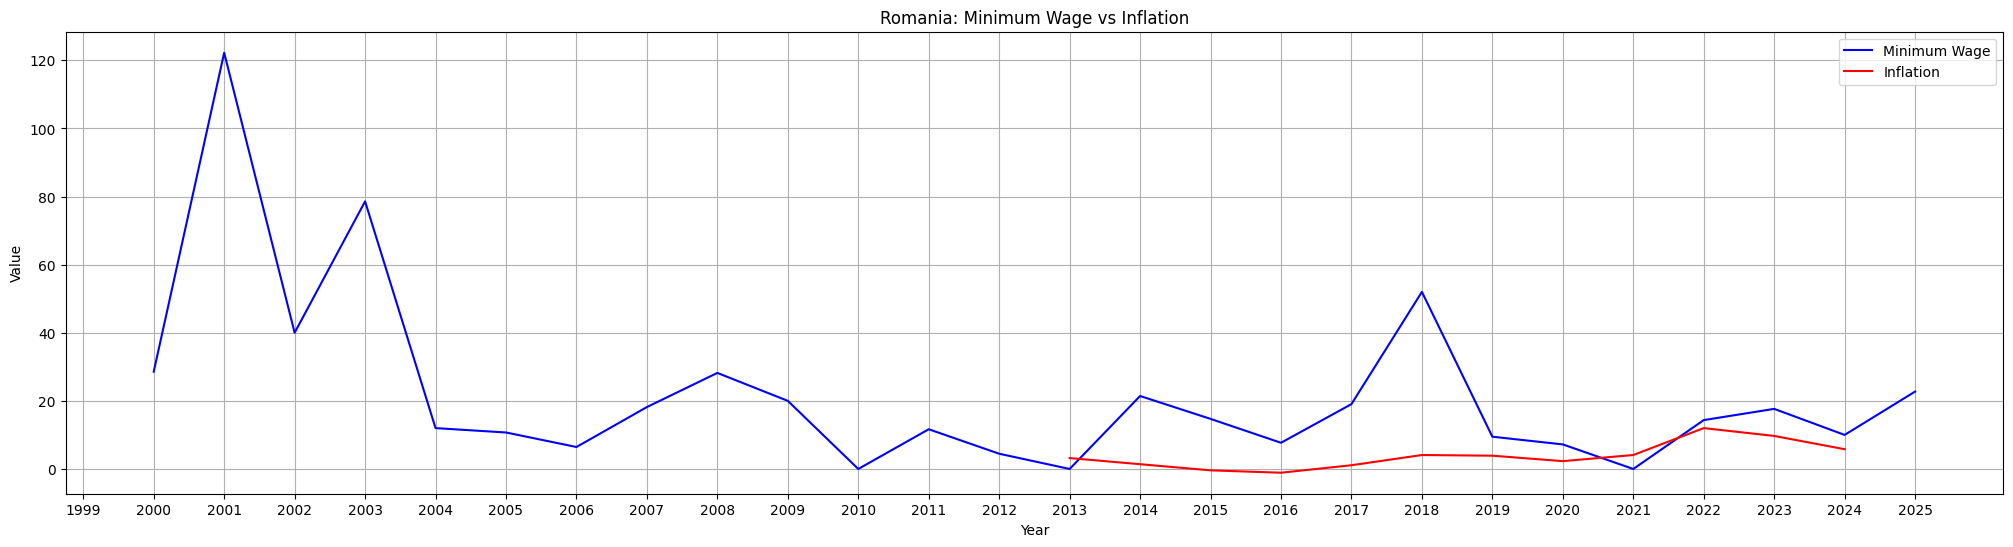

In [88]:
# let's plot both side by side

# Make sure both datasets have a 'year' column (integer, not string)
df = romania_minimum_wage_salaries.merge(
    inflation_romania,
    on="TIME_PERIOD",
    how="left",  # keeps all years from wages, NaN for missing inflation
    suffixes=("_wage", "_inflation")
)

import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))
plt.plot(df["TIME_PERIOD"], df["pct_change"], label="Minimum Wage", color="blue")
plt.plot(df["TIME_PERIOD"], df["OBS_VALUE_inflation"], label="Inflation", color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Romania: Minimum Wage vs Inflation")
plt.legend()
plt.grid()
plt.xticks(romania_minimum_wage_salaries.TIME_PERIOD)
plt.show()


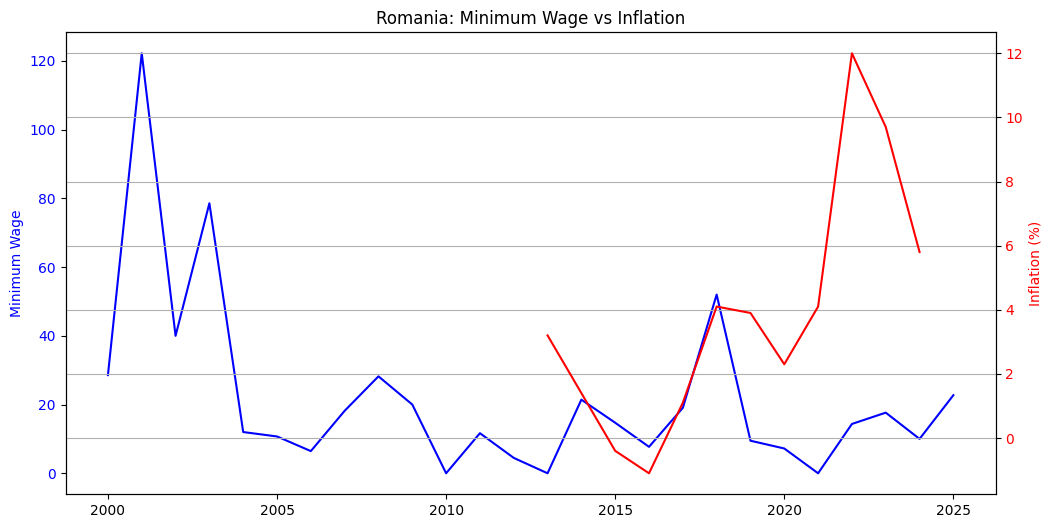

In [98]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df["TIME_PERIOD"], df["pct_change"], color="blue", label="Minimum Wage")
ax1.set_ylabel("Minimum Wage", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["TIME_PERIOD"], df["OBS_VALUE_inflation"], color="red", label="Inflation")
ax2.set_ylabel("Inflation (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Romania: Minimum Wage vs Inflation")
plt.grid()
plt.show()